In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [13]:
# fortran compile
compile_command = "gfortran -o test1.exe dvode_f90_m.F90 zdplaskin_m.F90 main_code.F90 bolsig_x86_64_g.dll"
run_command = "test1.exe"

In [14]:
# compile 실행
compile_process = subprocess.run(compile_command, shell=True, check=True, capture_output=True, text=True)
print("컴파일 완료")

컴파일 완료


In [15]:
try:
    run_process = subprocess.run(run_command, shell=True, check=True, capture_output=True, text=True)
    print("실행 완료")
except subprocess.CalledProcessError as e:
    print(f"실행 중 오류 발생: {e}")
    print(f"표준 출력: {e.stdout}")
    print(f"표준 에러: {e.stderr}")

실행 중 오류 발생: Command 'test1.exe' returned non-zero exit status 2.
표준 출력: 
Ar DBD Plasam Case Study
 found 201 points in data_EN.datfile

ZDPlasKin (version 2.0a) INIT:
  species        ... 5
  reactions      ... 7
  BOLSIG+ loader ... bolsigdb.dat : 2 species & 5 collisions
  species  link  ... 2
  process  link  ... 4
ZDPlasKin INFO: reset data and configuration
ZDPlasKin INFO: set accuracy 1.00D-10 (absolute) & 1.00D-05 (relative)
ZDPlasKin INIT DONE

ZDPlasKin INFO: set autosave in QTplaskin format ON ...
          TIME
   1.00000E-04

PRESS ENTER TO EXIT ...
표준 에러: At line 126 of file main_code.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:

Could not print backtrace: libbacktrace could not find executable to open
#0  0xffffffff
#1  0xffffffff
#2  0xffffffff
#3  0xffffffff
#4  0xffffffff
#5  0xffffffff
#6  0xffffffff
#7  0xffffffff
#8  0xffffffff
#9  0xffffffff
#10  0xffffffff
#11  0xffffffff
#12  0xffffffff



In [16]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [17]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000e+00,1.2790,400.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,5.000000e-07,1.2790,400.0,1.859707,5.121200e-14,1.198600e-11,2.789560
2,1.000000e-06,3.8054,400.0,3.098362,6.846000e-14,4.767400e-11,4.647543
3,1.500000e-06,6.2381,400.0,3.450639,1.043700e-13,1.191500e-10,5.175958
4,2.000000e-06,8.5172,400.0,3.536726,1.449600e-13,2.259400e-10,5.305089
...,...,...,...,...,...,...,...
165,9.700000e-05,13.8990,400.0,3.648837,6.671800e-12,1.696900e-08,5.473256
166,9.750000e-05,12.3950,400.0,3.620659,6.046200e-12,1.371500e-08,5.430988
167,9.900000e-05,6.2381,400.0,3.450639,3.007800e-12,3.433600e-09,5.175958
168,9.950000e-05,3.8054,400.0,3.098362,1.972900e-12,1.373900e-09,4.647543


In [18]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [19]:
df_den

,Time_s,E,AR,AR*,AR^+,E(W)
0,0.000000e+00,1.00000,1.830000e+19,0.000000e+00,1.000,0.000000e+00
1,5.000000e-07,1.00000,1.830000e+19,7.894100e-14,1.000,6.394700e-07
2,1.000000e-06,1.00000,1.830000e+19,8.425700e-01,1.000,2.542100e-06
3,1.500000e-06,0.99999,1.830000e+19,1.666500e+01,1.000,5.661200e-06
4,2.000000e-06,1.00000,1.830000e+19,5.939700e+01,1.000,9.919800e-06
...,...,...,...,...,...,...
165,9.700000e-05,28.51500,1.830000e+19,6.451500e+04,28.523,7.992900e-03
166,9.750000e-05,28.77300,1.830000e+19,6.633500e+04,28.781,8.181200e-03
167,9.900000e-05,28.81800,1.830000e+19,6.507100e+04,28.827,8.553500e-03
168,9.950000e-05,28.81800,1.830000e+19,6.333500e+04,28.827,8.608300e-03


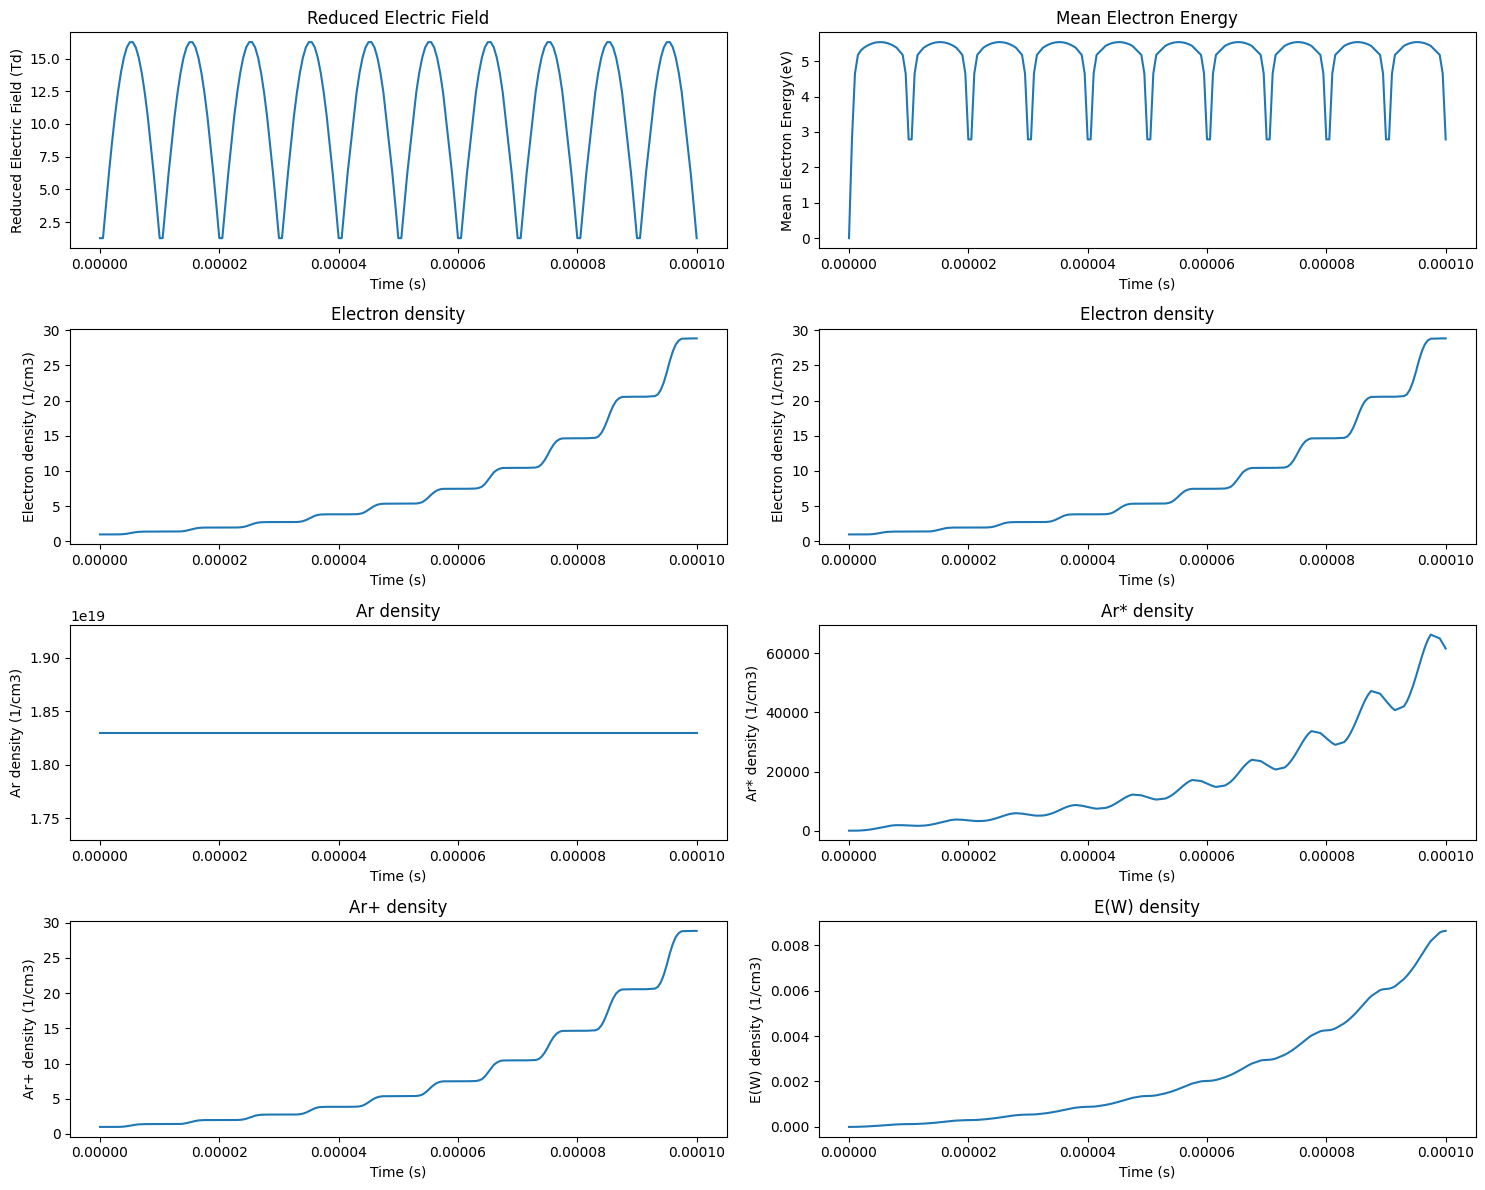

In [20]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(424)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(425)
plt.plot(df_den['Time_s'], df_den['AR'])
plt.title('Ar density')
plt.xlabel('Time (s)')
plt.ylabel('Ar density (1/cm3)')

plt.subplot(426)
plt.plot(df_den['Time_s'], df_den['AR*'])
plt.title('Ar* density')
plt.xlabel('Time (s)')
plt.ylabel('Ar* density (1/cm3)')

plt.subplot(427)
plt.plot(df_den['Time_s'], df_den['AR^+'])
plt.title('Ar+ density')
plt.xlabel('Time (s)')
plt.ylabel('Ar+ density (1/cm3)')

plt.subplot(428)
plt.plot(df_den['Time_s'], df_den['E(W)'])
plt.title('E(W) density')
plt.xlabel('Time (s)')
plt.ylabel('E(W) density (1/cm3)')

plt.tight_layout()
plt.show()

In [21]:
df.columns

NameError: name 'df' is not defined